In [107]:
# Packages & Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.dummy import DummyClassifier
#from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [108]:
# pip install -U scikit-learn

In [109]:
df = pd.read_csv("D:\german_credit_data.csv",index_col="Unnamed: 0")

In [110]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [111]:
print(df["Risk"].value_counts())

good    700
bad     300
Name: Risk, dtype: int64


In [112]:
def nans(df): return df[df.isnull().any(axis=1)]

In [113]:
df_NaN = nans(df)

In [114]:
print(df.describe())


print(df_NaN.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000
              Age         Job  Credit amount    Duration
count  478.000000  478.000000     478.000000  478.000000
mean    36.263598    1.935146    3263.081590   20.426778
std     10.874237    0.619375    2704.782794   11.582621
min     19.000000    0.000000     250.000000    4.000000
25%     28.000000    2.000000    1429.000000   12.000000
50%     35.000000    2.000000    2290.000000   18.000000
75%     42.000000    2.000000    3957.500000   24.000000
max 

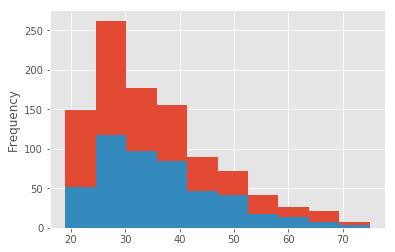

In [115]:
ax = df["Age"].plot.hist()
df_NaN["Age"].plot.hist()

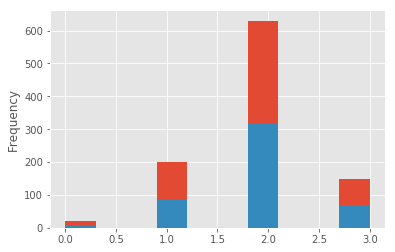

In [116]:
ax = df["Job"].plot.hist()
df_NaN["Job"].plot.hist()

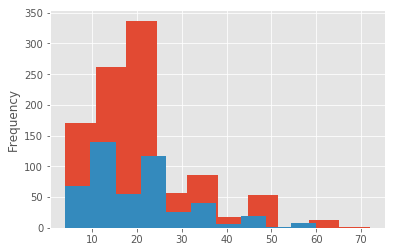

In [117]:
ax = df["Duration"].plot.hist()
df_NaN["Duration"].plot.hist()

In [118]:
#https://stackoverflow.com/questions/33906682/python-classification-without-having-to-impute-missing-values

In [119]:
# The number of NaN Values in dataset
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [120]:
# Changing Column Names 
df = df.rename(columns={'Saving accounts': 'Saving_Accounts','Checking account': 'Checking_Account',
                        'Credit amount': 'Credit_Amount'}, 
               index={'ONE': 'one'})
df.head() 

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [121]:
df['Saving_Accounts']=df['Saving_Accounts'].fillna(value="None")

In [122]:
df['Checking_Account']=df['Checking_Account'].fillna(value="None")

In [123]:
df.head()

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [124]:
# Missing Value Check. There isnt any missing value
missing_value=df.isnull()

any(missing_value["Age"])
any(missing_value["Sex"])
any(missing_value["Job"])
any(missing_value["Housing"])
any(missing_value["Saving_Accounts"])
any(missing_value["Checking_Account"])
any(missing_value["Credit_Amount"])
any(missing_value["Duration"])
any(missing_value["Purpose"])
any(missing_value["Risk"])

False

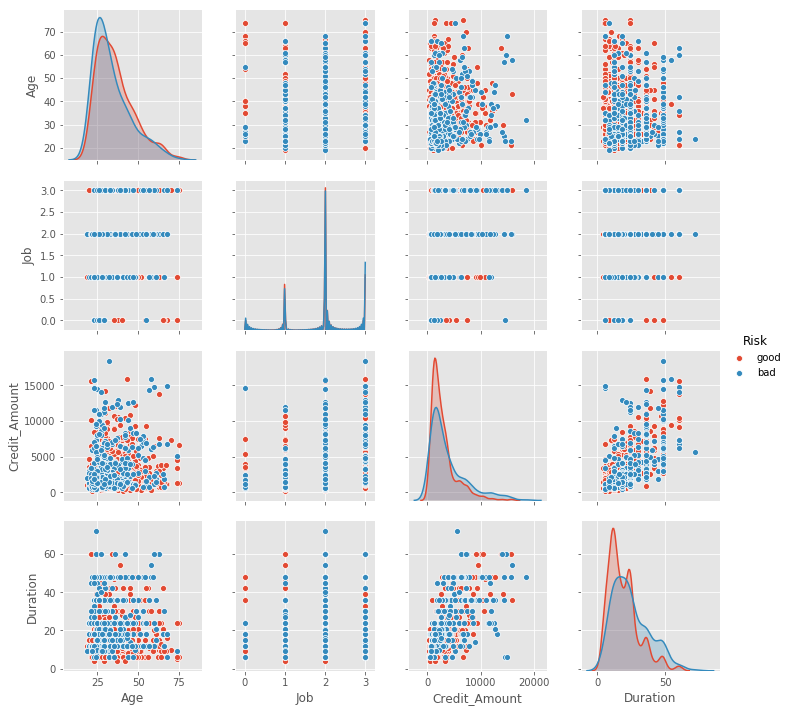

In [125]:
sns.pairplot(df,hue="Risk")

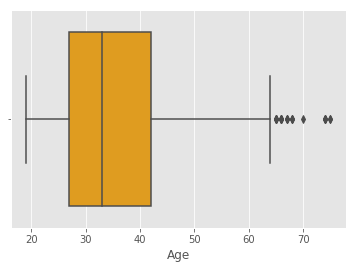

In [126]:
# Outlier Detection for Age. 
sns.boxplot(x=df["Age"],color="Orange")

Each is customer is important for the company. There isnt outlier


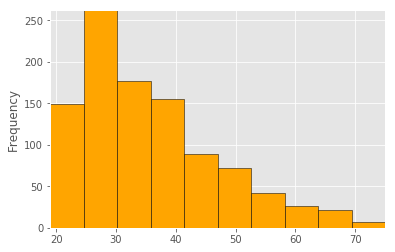

In [127]:
# Distribution of Age
df["Age"].plot.hist(bins=10,edgecolor="K",color="Orange").autoscale(enable=True,axis="both",tight=True)

print("Each is customer is important for the company. There isnt outlier")

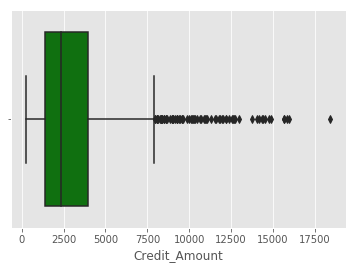

In [128]:
# Outlier Detection for Credit Amount 
sns.boxplot(x=df["Credit_Amount"],color="Green")

Credit amounts higher than 7500 seems outlier however they are also important to the bank


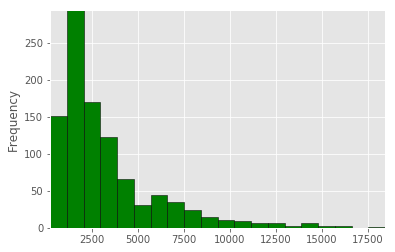

In [129]:
# Distribution of Credit Amount
df["Credit_Amount"].plot.hist(bins=20,edgecolor="K",color="Green").autoscale(enable=True,axis="both",tight=True)

print("Credit amounts higher than 7500 seems outlier however they are also important to the bank")

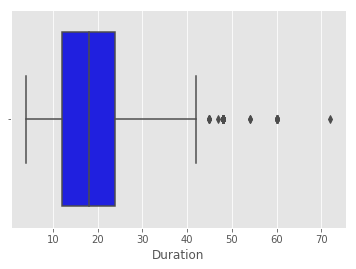

In [130]:
# Outlier Detection for Duration. 
sns.boxplot(x=df["Duration"],color="Blue")

Consumers mainly choose lower durations.


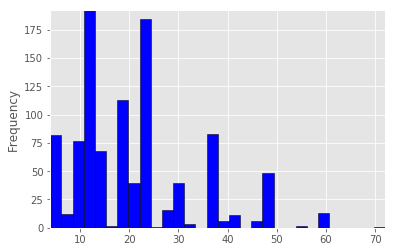

In [131]:
#Bin sayısını 50'ye çıkarttık
df["Duration"].plot.hist(bins=30,edgecolor="K",color="Blue").autoscale(enable=True,axis="both",tight=True)
print("Consumers mainly choose lower durations.")

In [132]:
# Pair Comparison for Sex
date_int = ["Sex", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Sex,,
female,109,201
male,191,499


In [133]:
# Pair Comparison for Job
date_int = ["Job", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Job,,
0,7,15
1,56,144
2,186,444
3,51,97


In [134]:
# Pair Comparison for Housing 
date_int = ["Housing", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109


In [135]:
# Pair Comparison for Saving_Accounts
date_int = ["Saving_Accounts", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Saving_Accounts,,
None,32,151
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [136]:
# Pair Comparison for Checking_Account 
date_int = ["Checking_Account", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Checking_Account,,
None,46,348
little,135,139
moderate,105,164
rich,14,49


In [137]:
# Pair Comparison for Purpose
date_int = ["Purpose", 'Risk']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


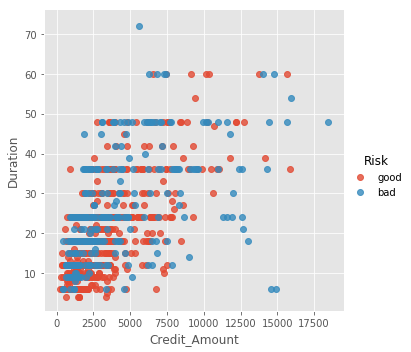

In [138]:
# Scatter Plot of Credit Amount & Duration
sns.lmplot( x="Credit_Amount", y="Duration", data=df, fit_reg=False, hue='Risk', legend=True)

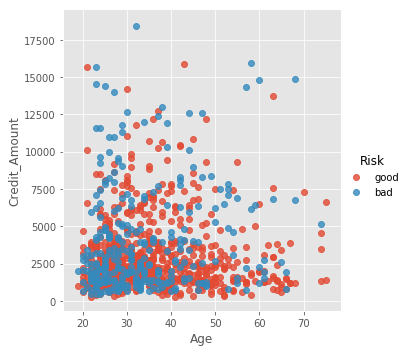

In [139]:
# Scatter Plot of Credit Amount & Age
sns.lmplot( x="Age", y="Credit_Amount", data=df, fit_reg=False, hue='Risk', legend=True)

In [140]:
# Converting Categorical Data to Numerical Data (Saving_Accounts, Checking_Account and Risk )

cleanup_nums = {"Saving_Accounts":     {"None": 0,"little": 1, "moderate": 2, "rich": 3, "quite rich": 4},
               "Checking_Account":     {"None": 0,"little": 1, "moderate": 2, "rich": 3},
               "Risk":     {"bad": 1, "good": 0}}

df.replace(cleanup_nums, inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
0,67,male,2,own,0,1,1169,6,radio/TV,0
1,22,female,2,own,1,2,5951,48,radio/TV,1
2,49,male,1,own,1,0,2096,12,education,0
3,45,male,2,free,1,1,7882,42,furniture/equipment,0
4,53,male,2,free,1,1,4870,24,car,1


In [143]:
#Creating Dummies Variables 

# Sex
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), 
                            left_index=True, right_index=True)
# Job
df = df.merge(pd.get_dummies(df.Job, drop_first=True, prefix='Job'), 
                            left_index=True, right_index=True)
# Housing
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), 
                            left_index=True, right_index=True)
# Purpose
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), 
                            left_index=True, right_index=True)



In [150]:
df.columns

Index(['Age', 'Saving_Accounts', 'Checking_Account', 'Credit_Amount',
       'Duration', 'Risk', 'Sex_male_x', 'Job_1_x', 'Job_2_x', 'Job_3_x',
       'Housing_own_x', 'Housing_rent_x', 'Purpose_car_x',
       'Purpose_domestic appliances_x', 'Purpose_education_x',
       'Purpose_furniture/equipment_x', 'Purpose_radio/TV_x',
       'Purpose_repairs_x', 'Purpose_vacation/others_x', 'Sex_male_y',
       'Job_1_y', 'Job_2_y', 'Job_3_y', 'Housing_own_y', 'Housing_rent_y',
       'Purpose_car_y', 'Purpose_domestic appliances_y', 'Purpose_education_y',
       'Purpose_furniture/equipment_y', 'Purpose_radio/TV_y',
       'Purpose_repairs_y', 'Purpose_vacation/others_y'],
      dtype='object')

In [146]:
df.head()

,Age,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Risk,Sex_male_x,Job_1_x,Job_2_x,Job_3_x,...,Job_3_y,Housing_own_y,Housing_rent_y,Purpose_car_y,Purpose_domestic appliances_y,Purpose_education_y,Purpose_furniture/equipment_y,Purpose_radio/TV_y,Purpose_repairs_y,Purpose_vacation/others_y
0,67,0,1,1169,6,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,22,1,2,5951,48,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,0,2096,12,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,45,1,1,7882,42,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,1,4870,24,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [147]:
nans(df)


,Age,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Risk,Sex_male_x,Job_1_x,Job_2_x,Job_3_x,...,Job_3_y,Housing_own_y,Housing_rent_y,Purpose_car_y,Purpose_domestic appliances_y,Purpose_education_y,Purpose_furniture/equipment_y,Purpose_radio/TV_y,Purpose_repairs_y,Purpose_vacation/others_y


In [151]:
# Splitting the Data with the Ratio of %80

X = df[['Age', 'Saving_Accounts', 'Checking_Account', 'Credit_Amount',
       'Duration', 'Sex_male_x', 'Job_1_x', 'Job_2_x', 'Job_3_x',
       'Housing_own_x', 'Housing_rent_x', 'Purpose_car_x',
       'Purpose_domestic appliances_x', 'Purpose_education_x',
       'Purpose_furniture/equipment_x', 'Purpose_radio/TV_x',
       'Purpose_repairs_x', 'Purpose_vacation/others_x', 'Sex_male_y',
       'Job_1_y', 'Job_2_y', 'Job_3_y', 'Housing_own_y', 'Housing_rent_y',
       'Purpose_car_y', 'Purpose_domestic appliances_y', 'Purpose_education_y',
       'Purpose_furniture/equipment_y', 'Purpose_radio/TV_y',
       'Purpose_repairs_y', 'Purpose_vacation/others_y']]
y = df["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [152]:
# 1- Logistic Regression Classification Model 
# Building the Model on the Train data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
# Testing the Model on the Test data (X_test)
y_pred = logreg.predict(X_test)
print("Accuracy of Logistic Regression Classifier on Test Data: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on Test Data: 0.71


In [154]:
# Classification Report of Logistic Regression
# Comparing the Results (y_pred) with the untouched Test Data (y_test)

print("Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       563
           1       0.51      0.28      0.36       237

   micro avg       0.71      0.71      0.71       800
   macro avg       0.63      0.58      0.59       800
weighted avg       0.68      0.71      0.68       800



In [155]:
# Confusion Matrix of Logistic Regression
print("Confusion Matrix of Logistic Regression")
confusion_matrix(y_test, y_pred)

Confusion Matrix of Logistic Regression


array([[499,  64],
       [170,  67]], dtype=int64)

In [156]:
# 2- Support Vector Machine
# Building the Model on the Train data

clf = SVC(C= 10, gamma = 0.5 )
clf.fit(X_train , y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
# Testing the Model on the Test data (X_test)
y_pred = clf.predict(X_test)
print("Accuracy of SVM Classifier on Test Data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of SVM Classifier on Test Data: 0.70


In [158]:
# Classification Report of SVC
# Comparing the Results (y_pred) with the untouched Test Data (y_test)

print("Classification Report of SVC")
print(classification_report(y_test, y_pred))

Classification Report of SVC
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       563
           1       0.00      0.00      0.00       237

   micro avg       0.70      0.70      0.70       800
   macro avg       0.35      0.50      0.41       800
weighted avg       0.50      0.70      0.58       800



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [159]:
# Confusion Matrix of SVM
print("Confusion Matrix of SVM")
confusion_matrix(y_test, y_pred)

Confusion Matrix of SVM


array([[563,   0],
       [237,   0]], dtype=int64)

In [160]:
# 3- Random Forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [161]:
# Testing the Model on the Test data (X_test)
y_pred = classifier.predict(X_test)
print("Accuracy of Random Forest Classifier on Test Data: {:.2f}".format(classifier.score(X_test, y_test)))

Accuracy of Random Forest Classifier on Test Data: 0.71


In [162]:
# Classification Report of Random Forest
# Comparing the Results (y_pred) with the untouched Test Data (y_test)

print("Classification Report of Random Forest")
print(classification_report(y_test, y_pred))

Classification Report of Random Forest
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       563
           1       0.51      0.26      0.35       237

   micro avg       0.71      0.71      0.71       800
   macro avg       0.63      0.58      0.58       800
weighted avg       0.67      0.71      0.67       800



In [163]:
# Confusion Matrix of Random Forest
print("Confusion Matrix of Random Forest")
confusion_matrix(y_test, y_pred)

Confusion Matrix of Random Forest


array([[503,  60],
       [175,  62]], dtype=int64)

In [164]:
# 4- Naive Bayes 
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [165]:
# Testing the Model on the Test data (X_test)
y_pred = classifier.predict(X_test)
print("Accuracy of Naive Bayes Classifier on Test Data: {:.2f}".format(classifier.score(X_test, y_test)))

Accuracy of Naive Bayes Classifier on Test Data: 0.67


In [166]:
# Classification Report of Naive Bayes
# Comparing the Results (y_pred) with the untouched Test Data (y_test)

print("Classification Report of Naive Bayes")
print(classification_report(y_test, y_pred))

Classification Report of Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       563
           1       0.43      0.38      0.40       237

   micro avg       0.67      0.67      0.67       800
   macro avg       0.59      0.58      0.58       800
weighted avg       0.65      0.67      0.66       800



In [167]:
# Confusion Matrix of Naive Bayes
print("Confusion Matrix of Naive Bayes")
confusion_matrix(y_test, y_pred)

Confusion Matrix of Naive Bayes


array([[444, 119],
       [148,  89]], dtype=int64)

In [168]:
# Model Selection & Evaluation Metric is the Recall

# Naive Bayes has the best probability of detection by %38. For credit scoring, TP and FN values are more important than FP

# Models aim to decrease false negatives and to increase true positives